In [1]:
import glob
import pandas as pd
import os

In [2]:
def concatenate_csv_local(file_dir, dest_dir, output_filename="output"):
    """
    Conatenates multiple hourly csv into one daily file. 
    """
    try:
        files = glob.glob(os.path.join(file_dir, "MP_*.csv")) 
        
        date_columns = ['RUN_TIME']
            
        df = pd.concat((pd.read_csv(f, header = 0, error_bad_lines=False, skipfooter=1, engine='python', parse_dates=date_columns) for f in files))
        df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
        df.to_csv(os.path.join(dest_dir, "Combined-{}.csv".format(output_filename)), index=False)
        print("Concatenate sucess: RTD-{}.csv".format(output_filename))
        
    except ValueError:
        print("File not found: {}".format(output_filename))

In [3]:
t_props = [
  ('font-size', '80%')
  ]
   
styles = [
  dict(selector="th", props=t_props),
  dict(selector="td", props=t_props)
  ]

In [4]:
dir = "/Volumes/data/projects/django-mms/data/market_clearing"

In [5]:
concatenate_csv_local(dir,dir,"market-clearing-price")
filename = os.path.join(dir, "Combined-market-clearing-price" + "." + "csv")
df = pd.read_csv(filename)

Concatenate sucess: RTD-market-clearing-price.csv


In [6]:
df.head().style.set_table_styles(styles)

,RUN_TIME,MKT_TYPE,TIME_INTERVAL,REGION_NAME,RESOURCE_NAME,RESOURCE_TYPE,COMMODITY_TYPE,MARGINAL_PRICE
0,2021-06-26 00:00:00,RTD,06/26/2021 00:05:00,CLUZ,03PAGBIL_G03,G,En,1994.420000
1,2021-06-26 00:00:00,RTD,06/26/2021 00:05:00,CMIN,10AGUS2_U01,G,En,2000.000000
2,2021-06-26 00:00:00,RTD,06/26/2021 00:05:00,CMIN,10AGUS2_U02,G,En,2000.000000
3,2021-06-26 00:05:00,RTD,06/26/2021 00:10:00,CLUZ,03PAGBIL_G03,G,En,1994.420000
4,2021-06-26 00:05:00,RTD,06/26/2021 00:10:00,CMIN,10AGUS6_U04,G,En,2000.000000


In [7]:
df.tail().style.set_table_styles(styles)

,RUN_TIME,MKT_TYPE,TIME_INTERVAL,REGION_NAME,RESOURCE_NAME,RESOURCE_TYPE,COMMODITY_TYPE,MARGINAL_PRICE
147563,2021-08-14 23:50:00,RTD,08/14/2021 11:55:00 PM,CVIS,08PEDC_U01,G,En,3305.000000
147564,2021-08-14 23:50:00,RTD,08/14/2021 11:55:00 PM,CVIS,08PEDC_U02,G,En,3305.000000
147565,2021-08-14 23:50:00,RTD,08/14/2021 11:55:00 PM,CMIN,11STEAG_U02,G,En,-7000.000300
147566,2021-08-14 23:55:00,RTD,08/15/2021,CLUZ,01ANDA_G01,G,En,3200.000000
147567,2021-08-14 23:55:00,RTD,08/15/2021,CMIN,11STEAG_U02,G,En,-7000.000200


In [8]:
df = df[df["REGION_NAME"] != "CMIN"]

In [9]:
df.groupby(df['REGION_NAME']).count().style.set_table_styles(styles)

,RUN_TIME,MKT_TYPE,TIME_INTERVAL,RESOURCE_NAME,RESOURCE_TYPE,COMMODITY_TYPE,MARGINAL_PRICE
REGION_NAME,,,,,,,
CLUZ,23257,23257,23257,23257,23257,23257,23257
CVIS,12625,12625,12625,12625,12625,12625,12625


In [10]:
df_price = df.groupby(df['RUN_TIME']).mean()

# Resetting the index
df_price = df_price.reset_index()

# Removing AM/PM from RUN_TIME
df_price['RUN_TIME'] = df_price['RUN_TIME'].str.replace(r'[^\W\d_]', '')

# Setting RUN_TIME to datetime
df_price['RUN_TIME'] = pd.to_datetime(df_price['RUN_TIME'])

# Setting RUN_TIME as sorted index
df_price = df_price.set_index('RUN_TIME')

df_price = df_price.sort_index()

/Users/Emman/opt/anaconda3/envs/env-jupyterbook/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [11]:
df_price.head().style.set_table_styles(styles)

,MARGINAL_PRICE
RUN_TIME,
2021-06-26 00:00:00,1994.420000
2021-06-26 00:05:00,1994.420000
2021-06-26 00:10:00,0.000000
2021-06-26 00:15:00,16000.090000
2021-06-26 00:20:00,2043.500000


In [12]:
df_price_hr = df_price.resample('1H').mean()
df_price_day = df_price.resample('1D').mean()
df_price_7d = df_price.rolling('7D').mean()

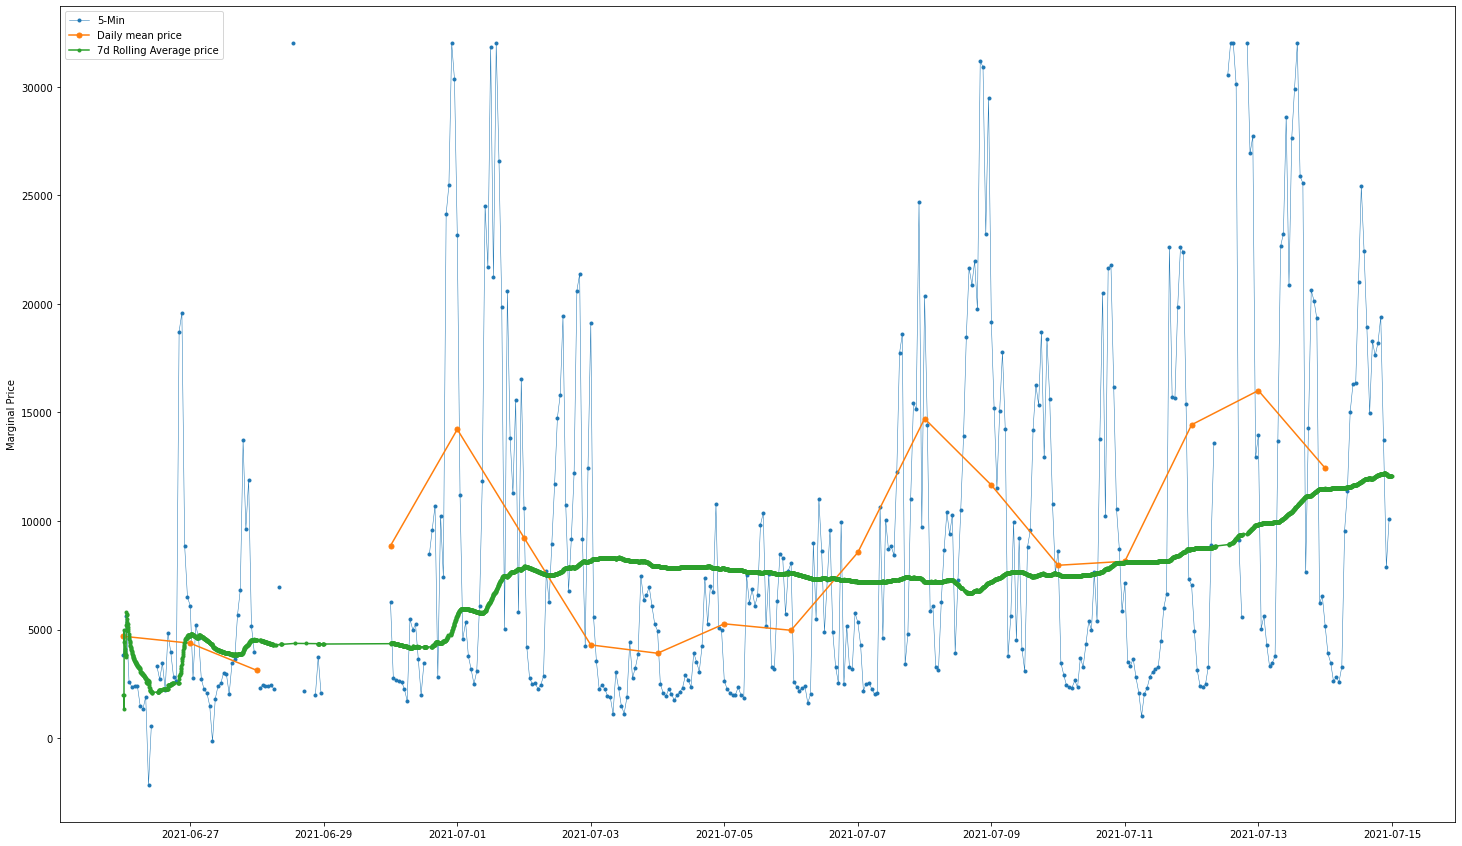

In [13]:
import matplotlib.pyplot as plt

start, end = '2021-06-26', '2021-07-14'

fig, ax = plt.subplots(figsize=(25,15))

ax.plot(df_price_hr.loc[start:end, 'MARGINAL_PRICE'], marker='.', linestyle='-', linewidth=0.5, label='5-Min')
ax.plot(df_price_day.loc[start:end, 'MARGINAL_PRICE'], marker='o', markersize=5, linestyle='-', label = 'Daily mean price')
ax.plot(df_price_7d.loc[start:end, 'MARGINAL_PRICE'], marker='.', linestyle='-', label='7d Rolling Average price')
ax.set_ylabel('Marginal Price')

ax.legend()

In [14]:
# #import calendar
# #all_month_year_df = pd.pivot_table(df_price, values="MARGINAL_PRICE",
# #                                   index=["RUN_TIME"],
# #                                   columns=["RUN_TIME"],
# #                                   fill_value=0,
# #                                   margins=True)
# named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
# all_month_year_df = all_month_year_df.set_index(named_index)
# all_month_year_df